## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [22]:
def ImageDisplay(Images,ColorMap=None):
    '''
    for visualizing the image output for all scenarios
    '''
    # // is the floored-division operator in Python
    cols = 3
    rows = (len(Images)+1)//cols
    plt.figure(figsize=(10,11))
    #setting up the layout to display images
    for iterator, Image in enumerate(Images):
        plt.subplot(rows,cols,iterator+1)
        ColorMap = 'gray' if len(Image.shape)==2 else ColorMap
        plt.imshow(Image,cmap=ColorMap)
        plt.xticks([])
        plt.yticks([])
        #plt.savefig('RectififedImages.png')
    plt.tight_layout(pad=0,h_pad=0,w_pad=0)
    plt.show()

In [23]:
TestImages = [plt.imread(path) for path in glob.glob('./camera_cal/rect/*.jpg')]
#ImageDisplay(TestImages)

In [24]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
#%matplotlib qt
import os
print(os.environ.get('QT_API'))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,30,0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
def CameraCalibration():
    '''
    Function Name: CameraCalibration
    Parameters   : one matplotlib image
    return       : one matplotlib image
    Purpose      : This Function accepts CheckerBoaard Images as input whose
    real world coordinates are already known. It utilizes the opencv
    cv2.findChessboardCorners() function to detect the corners of the image.
    '''
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
    images = glob.glob('./camera_cal/*.jpg')
#print(images)
# Step through the list and search for chessboard corners
    
    print('calibrating...............')
    for fname in images:
        print(os.path.basename(fname))
        #print(x)
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #cv2.imshow('gray',gray)
        #cv2.waitKey(0)
    
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            #cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
            imgpoints.append(corners)
    #distortion correction
    #img = cv2.imread('./camera_cal/calibration1.jpg')
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:2], None, None)
    '''
    print('rectifying the images............')
    for fname in images:
        print(os.path.basename(fname))
        img = cv2.imread(fname)
        w,h = img.shape[:2]
        newcameramtx , roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h))
        undist = cv2.undistort(img,mtx,dist,None,newcameramtx)
        x,y,_w,_h = roi
        cv2.imwrite('./camera_cal/rect/'+os.path.basename(fname),undist)
    '''
    return mtx,dist

None


In [25]:
#one time process
#CameraCalibration()

In [26]:
names = [os.path.basename(x) for x in glob.glob('./camera_cal/*.jpg')]
#print(names)

In [27]:
mtx,dist = CameraCalibration()

calibrating...............
calibration1.jpg
calibration10.jpg
calibration11.jpg
calibration12.jpg
calibration13.jpg
calibration14.jpg
calibration15.jpg
calibration16.jpg
calibration17.jpg
calibration18.jpg
calibration19.jpg
calibration2.jpg
calibration20.jpg
calibration3.jpg
calibration4.jpg
calibration5.jpg
calibration6.jpg
calibration7.jpg
calibration8.jpg
calibration9.jpg


In [68]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Read in an image
#img = cv2.imread('test_image2.png')
#h,  w = img.shape[:2]
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    h,  w = img.shape[:2]
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    offset = 100

    src = np.float32([[589,446],[694,445],[1096,717],[222,712]])
    offset = 100
    dstt = np.float32([[offset, offset], [h-offset, offset], 
                                     [h-offset, w-offset], 
                                     [offset, w-offset]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform(src,dstt)
    print(M)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(dst,M,(h,w))  
    #delete the next two lines
    #M = None
    #warped = np.copy(img) 
    return warped, M

(720L, 1280L)
[[-4.47532550e-01 -8.53896267e-01  6.35624617e+02]
 [-3.08842345e-02 -3.19024583e+00  1.43223066e+03]
 [-2.78936400e-05 -2.40284428e-03  1.00000000e+00]]


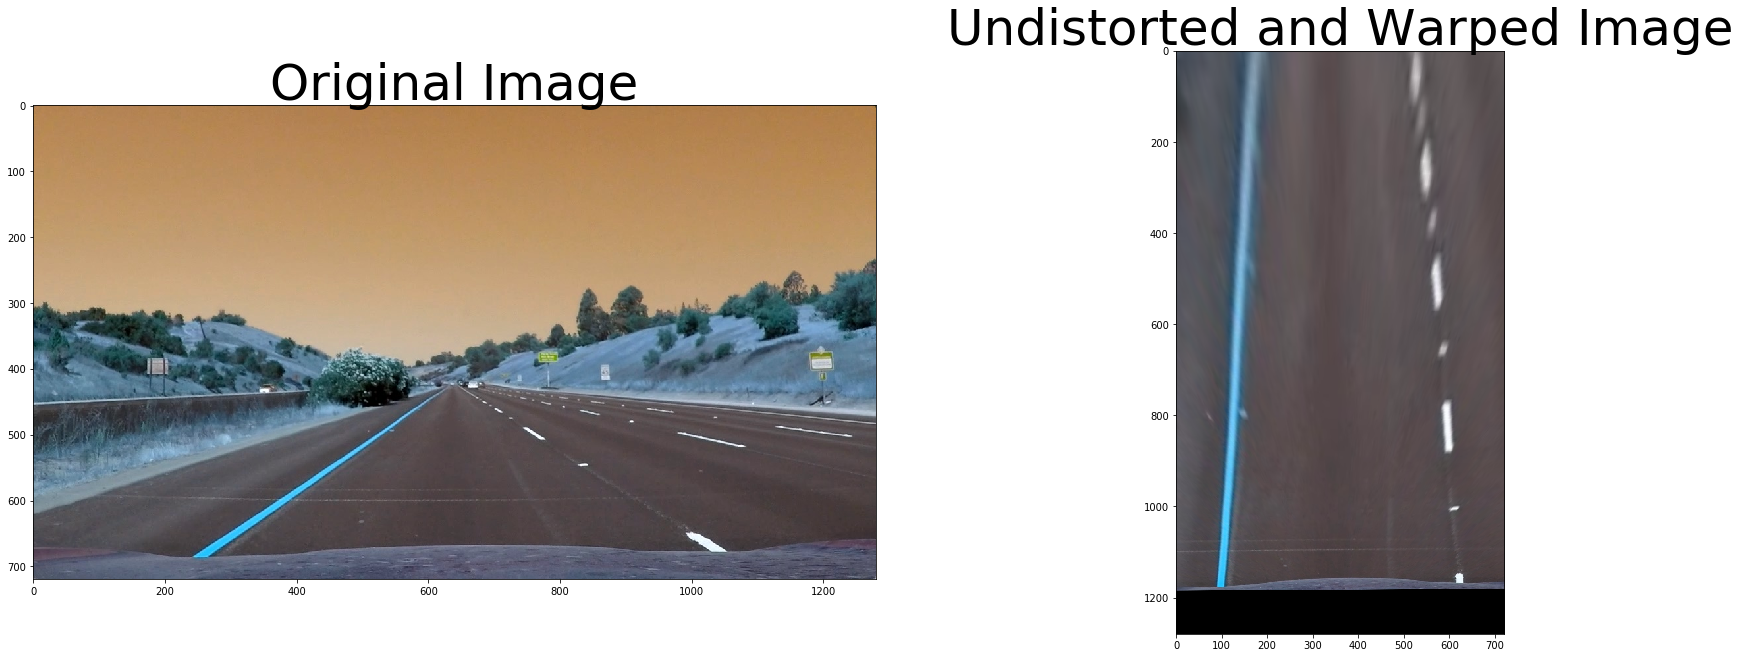

In [69]:
#mtx,dist = CameraCalibration()
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = cv2.imread('./test_images/straight_lines1.jpg')
h,  w = img.shape[:2]
print(h,w)

nx = 9
ny = 6
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down,cmap = plt.get_cmap('gray'))
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
